In [2]:
import cv2
import os
import numpy as np
from keras import layers, Model

In [3]:
# 데이터셋 경로 설정
BASE_PATH = 'chest_xray'
TRAIN_PATH = os.path.join(BASE_PATH, 'train')
TEST_PATH = os.path.join(BASE_PATH, 'test')
VAL_PATH = os.path.join(BASE_PATH, 'val')

In [58]:
def defineModelArchitecture(_img_dims) :
    #input layers
    inputs = layers.Input(shape=(_img_dims, _img_dims, 3))
    # first Conv Block
    x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPool2D(pool_size=(2,2))(x)
    # Second Conv Block
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPool2D(pool_size=(2,2))(x)
    # Third Conv Block
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)

    x = layers.MaxPool2D(pool_size=(2,2))(x)
    x = layers.Dropout(rate=0.2)(x)
    
    # Fully Connected Net
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(16, activation='relu')(x)
    x = layers.Dropout(rate=0.3)(x)
    
    output = layers.Dense(1, activation='sigmoid')(x)

    return inputs, output

In [60]:
from keras.preprocessing.image import ImageDataGenerator
# 훈련 이미지 전처리
train_image_gen = ImageDataGenerator(rescale = 1./255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
# 테스트에 사용되는 이미지는 정규화만 적용한다.
test_image_gen = ImageDataGenerator(rescale=1./255)

validation_image_gen = ImageDataGenerator(rescale=1./255)
# 훈련용 이미지를 폴더에서 가져온다.
train_set = train_image_gen.flow_from_directory('chest_xray/train/',
                                                target_size=(64,64),
                                                batch_size=128,
                                                class_mode='binary')
validation_set = validation_image_gen.flow_from_directory('chest_xray/val/',
                                                target_size=(64,64),
                                                batch_size=128,
                                                class_mode='binary')
# 테스트용 이미지를 폴더에서 가져온다.
test_set = test_image_gen.flow_from_directory('chest_xray/test/',
                                              target_size=(64,64),
                                              batch_size=128,
                                              class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [61]:
batch_size = 128
img_dims = 64
inputs, output = defineModelArchitecture(img_dims)

In [62]:
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit_generator(train_set,
                    steps_per_epoch=len(train_set),
                    epochs=9,
                    validation_data= test_set,
                    validation_steps=len(test_set))

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                          

C:\Users\LUA\AppData\Local\Temp\ipykernel_10592\1764267295.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set,


Epoch 1/9
41/41 [==============================] - 60s 1s/step - loss: 0.6251 - acc: 0.7306 - val_loss: 0.7503 - val_acc: 0.6250
Epoch 2/9
41/41 [==============================] - 58s 1s/step - loss: 0.5287 - acc: 0.7512 - val_loss: 0.6693 - val_acc: 0.6314
Epoch 3/9
41/41 [==============================] - 57s 1s/step - loss: 0.4572 - acc: 0.7899 - val_loss: 0.5688 - val_acc: 0.7885
Epoch 4/9
41/41 [==============================] - 59s 1s/step - loss: 0.3662 - acc: 0.8391 - val_loss: 0.5931 - val_acc: 0.7404
Epoch 5/9
41/41 [==============================] - 57s 1s/step - loss: 0.3337 - acc: 0.8577 - val_loss: 0.4053 - val_acc: 0.8365
Epoch 6/9
41/41 [==============================] - 57s 1s/step - loss: 0.2974 - acc: 0.8735 - val_loss: 0.3645 - val_acc: 0.8670
Epoch 7/9
41/41 [==============================] - 57s 1s/step - loss: 0.2780 - acc: 0.8854 - val_loss: 0.5412 - val_acc: 0.7965
Epoch 8/9
41/41 [==============================] - 57s 1s/step - loss: 0.2609 - acc: 0.8924 - val

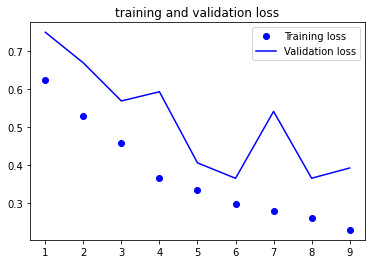

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 훈련, 검증 정확도 분석
epochs = range(1, len(acc) + 1)
plt.subplot()
plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.legend()
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.legend()

In [64]:
evaluation = model.evaluate(validation_set)

1/1 [==============================] - 0s 152ms/step - loss: 0.3855 - acc: 0.8125
